In [1]:
# !pip install h2o

In [2]:
import time
start_time = time.time()

import h2o
from h2o.automl import H2OAutoML
from sklearn.model_selection import train_test_split
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_392"; OpenJDK Runtime Environment (build 1.8.0_392-8u392-ga-1~20.04-b08); OpenJDK 64-Bit Server VM (build 25.392-b08, mixed mode)
  Starting server from /anaconda/envs/azureml_py38/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpkfdhs89i
  JVM stdout: /tmp/tmpkfdhs89i/h2o_azureuser_started_from_python.out
  JVM stderr: /tmp/tmpkfdhs89i/h2o_azureuser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 26 days
H2O_cluster_name:,H2O_from_python_azureuser_xcjpw5
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.456 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [3]:
# azureml-core of version 1.0.72 or higher is required
# azureml-dataprep[pandas] of version 1.1.34 or higher is required
from azureml.core import Workspace, Dataset

subscription_id = '2f5a6780-2fed-47cc-a89a-efd6b03243cc'
resource_group = 'ml_for_ccfd'
workspace_name = 'ml_for_ccfd_ws'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='Capstone_CCFD')
df=dataset.to_pandas_dataframe()

In [4]:
temp,test = train_test_split(df, test_size=0.2, random_state=42)
train, validation = train_test_split(temp, test_size=0.25, random_state=42)

train_h2o = h2o.H2OFrame(train, column_types={'Class': 'enum'})
validation_h2o = h2o.H2OFrame(validation, column_types={'Class': 'enum'})
test_h2o = h2o.H2OFrame(test, column_types={'Class': 'enum'})


target = 'Class'
features = train_h2o.columns.remove(target)

aml = H2OAutoML(max_models=10, seed=123) 
aml.train(x=features, y=target, training_frame=train_h2o, validation_frame=validation_h2o)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
14:44:24.263: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),8/10
# GBM base models (used / total),3/4
# XGBoost base models (used / total),3/3
# GLM base models (used / total),1/1
# DRF base models (used / total),1/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [5]:
best_model = aml.leader
best_model

key,value
Stacking strategy,cross_validation
Number of base models (used / total),8/10
# GBM base models (used / total),3/4
# XGBoost base models (used / total),3/3
# GLM base models (used / total),1/1
# DRF base models (used / total),1/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [6]:
end_time = time.time()
Workflow_Runtime = end_time - start_time
print(f"\nAutoML Workflow Runtime: {Workflow_Runtime:.2f} seconds")


AutoML Workflow Runtime: 433.03 seconds


In [8]:
start_time = time.time()
test_performance = best_model.model_performance(test_data=test_h2o)
end_time = time.time()

num_samples_test = len(test_h2o)
print(f"Number of samples in the test set: {num_samples_test} \n")

Prediction_Time = end_time - start_time
print(f"\nPrediction Time: {Prediction_Time:.2f} seconds")

Number of samples in the test set: 56962 


Prediction Time: 0.66 seconds


In [9]:
confusion = test_performance.confusion_matrix().table.as_data_frame()
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
              0.0   1.0   Error             Rate
0    0.0  56857.0   7.0  0.0001    (7.0/56864.0)
1    1.0     16.0  82.0  0.1633      (16.0/98.0)
2  Total  56873.0  89.0  0.0004   (23.0/56962.0)


In [10]:
num_samples_test = len(test_h2o)
print(f"Number of samples in the test set: {num_samples_test} \n")

Prediction_Time = end_time - start_time
print(f"\nPrediction Time: {Prediction_Time:.2f} seconds \n")

TP = confusion.loc[1, '1.0']
FP = confusion.loc[0, '1.0']
TN = confusion.loc[0, '0.0']
FN = confusion.loc[1, '0.0']

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
f1_score = 2 * (precision * recall) / (precision + recall)
false_positive_rate = FP / (FP + TN)
false_negative_rate = FN / (FN + TP)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1_score)
print("False Positive Rate:", false_positive_rate)
print("False Negative Rate:", false_negative_rate)

Number of samples in the test set: 56962 


Prediction Time: 0.66 seconds
Accuracy: 0.9995962220427653
Precision: 0.9213483146067416
Recall: 0.8367346938775511
Specificity: 0.9998768992684299
F1 Score: 0.877005347593583
False Positive Rate: 0.0001231007315700619
False Negative Rate: 0.16326530612244897


Number of samples in the test set: 56962 


Prediction Time: 0.66 seconds


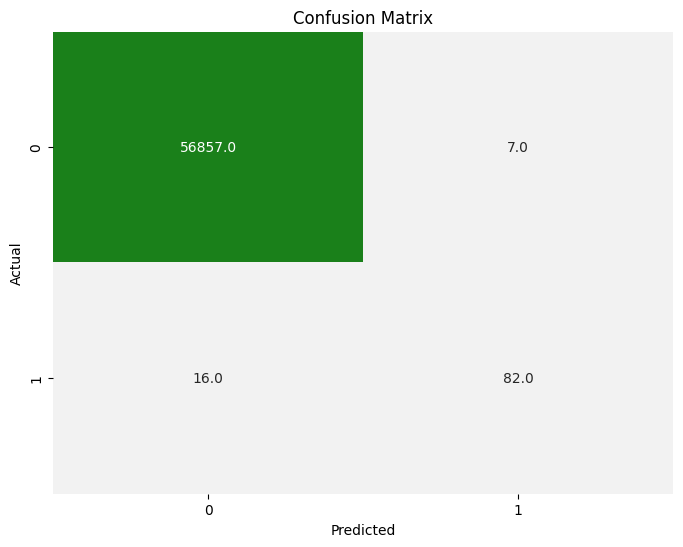

In [11]:
num_samples_test = len(test_h2o)
print(f"Number of samples in the test set: {num_samples_test} \n")

Prediction_Time = end_time - start_time
print(f"\nPrediction Time: {Prediction_Time:.2f} seconds")

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from matplotlib.colors import LinearSegmentedColormap

plt.rcParams['font.sans-serif'] = 'DejaVu Sans'

TP = confusion.loc[1, '1.0']
FP = confusion.loc[0, '1.0']
TN = confusion.loc[0, '0.0']
FN = confusion.loc[1, '0.0']

confusion_matrix_data = np.array([[TN, FP], [FN, TP]])
tn, fp, fn, tp = confusion_matrix_data.ravel()

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)

fig, ax = plt.subplots(figsize=(8, 6))

colors = [(0.95, 0.95, 0.95), (0.1, 0.5, 0.1)]
cmap = LinearSegmentedColormap.from_list('Custom', colors, len(colors))

sns.heatmap(confusion_matrix_data, annot=True, fmt='.1f', cmap=cmap, ax=ax, cbar=False)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')

plt.show()

In [12]:
h2o.shutdown()

H2O session _sid_8b21 closed.


/tmp/ipykernel_5579/3510427694.py:2: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown()
